# MiniVGGNet Keras CIFAR10

In [1]:
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

Using TensorFlow backend.
/home/pedro/anaconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pedro/anaconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pedro/anaconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [3]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib

# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# load the training and testing data, then scale it into the range [0, 1]
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

[INFO] loading CIFAR-10 data...


In [5]:
# convert the labels from integers to vectors
labelBinarizer = LabelBinarizer()
trainY = labelBinarizer.fit_transform(trainY)
testY = labelBinarizer.fit_transform(testY)

In [6]:
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# MiniVGGNet With BatchNorm

In [7]:
from classifiers.mini_vgg import MiniVGGNet

# initialize the optimizer and model
print("[INFO] compiling model...")
miniVGG = MiniVGGNet()
model = miniVGG.build(width=32, height=32, depth=3, classes=len(labelNames) , batch_norm=True)

opt = SGD(lr=0.01, decay=0.01 / 40, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


In [8]:
# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=64, epochs=40, verbose=1)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 71s 1ms/step - loss: 1.6576 - acc: 0.4462 - val_loss: 1.2000 - val_acc: 0.5786
Epoch 2/40
50000/50000 [==============================] - 68s 1ms/step - loss: 1.1639 - acc: 0.5960 - val_loss: 0.9890 - val_acc: 0.6571
Epoch 3/40
50000/50000 [==============================] - 68s 1ms/step - loss: 0.9731 - acc: 0.6607 - val_loss: 0.8414 - val_acc: 0.7014
Epoch 4/40
50000/50000 [==============================] - 69s 1ms/step - loss: 0.8645 - acc: 0.6988 - val_loss: 0.7908 - val_acc: 0.7256
Epoch 5/40
50000/50000 [==============================] - 68s 1ms/step - loss: 0.7889 - acc: 0.7236 - val_loss: 0.7636 - val_acc: 0.7354
Epoch 6/40
50000/50000 [==============================] - 69s 1ms/step - loss: 0.7321 - acc: 0.7457 - val_loss: 0.6749 - val_acc: 0.7641
Epoch 7/40
50000/50000 [==============================] - 69s 1ms/step - loss: 0.6780 - acc: 0.7602 -

In [9]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.84      0.85      0.85      1000
  automobile       0.93      0.91      0.92      1000
        bird       0.78      0.72      0.75      1000
         cat       0.67      0.69      0.68      1000
        deer       0.76      0.81      0.79      1000
         dog       0.78      0.74      0.76      1000
        frog       0.86      0.88      0.87      1000
       horse       0.90      0.87      0.89      1000
        ship       0.91      0.91      0.91      1000
       truck       0.88      0.91      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



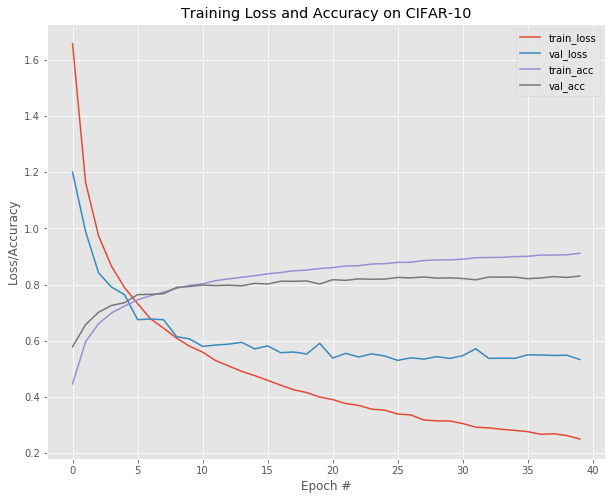

In [10]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on CIFAR-10")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

# MiniVGGNet Without BatchNorm

In [11]:
# initialize the model
miniVGG = MiniVGGNet()
model = miniVGG.build(width=32, height=32, depth=3, classes=len(labelNames) , batch_norm=False)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=64, epochs=40, verbose=1)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 59s 1ms/step - loss: 2.1224 - acc: 0.2078 - val_loss: 1.8813 - val_acc: 0.3440
Epoch 2/40
50000/50000 [==============================] - 59s 1ms/step - loss: 1.7965 - acc: 0.3477 - val_loss: 1.6301 - val_acc: 0.4093
Epoch 3/40
50000/50000 [==============================] - 59s 1ms/step - loss: 1.6183 - acc: 0.4096 - val_loss: 1.5196 - val_acc: 0.4557
Epoch 4/40
50000/50000 [==============================] - 59s 1ms/step - loss: 1.5180 - acc: 0.4472 - val_loss: 1.4242 - val_acc: 0.4812
Epoch 5/40
50000/50000 [==============================] - 60s 1ms/step - loss: 1.4490 - acc: 0.4746 - val_loss: 1.3487 - val_acc: 0.5072
Epoch 6/40
50000/50000 [==============================] - 59s 1ms/step - loss: 1.3901 - acc: 0.4959 - val_loss: 1.2828 - val_acc: 0.5379
Epoch 7/40
50000/50000 [==============================] - 60s 1ms/step - loss: 1.3386 - acc: 0.5171 -

In [12]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.78      0.79      0.78      1000
  automobile       0.85      0.88      0.87      1000
        bird       0.70      0.61      0.65      1000
         cat       0.61      0.54      0.57      1000
        deer       0.68      0.73      0.70      1000
         dog       0.69      0.63      0.66      1000
        frog       0.72      0.88      0.80      1000
       horse       0.79      0.81      0.80      1000
        ship       0.86      0.83      0.85      1000
       truck       0.83      0.83      0.83      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



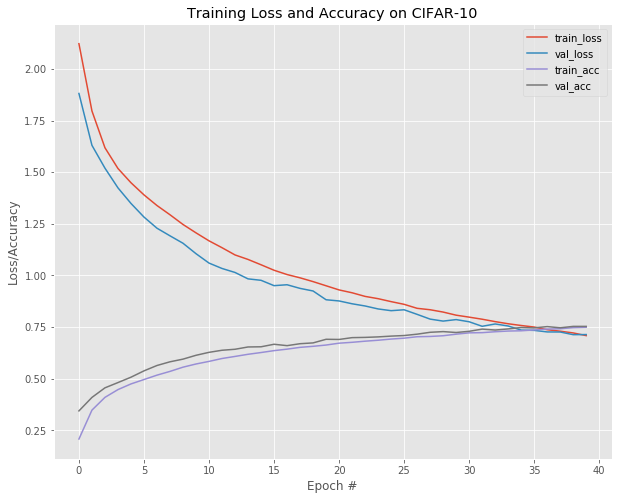

In [13]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on CIFAR-10")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

Well Done